___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
#Importing the importing libraries
import numpy as np
import pandas as pd
#Importing matplotlib for graphing
import matplotlib.pyplot as plt
#Importing seaborn for advanced graphing
import seaborn as sns
#Importing tensoflow
import tensorflow as tf

import os

#Importing the dataset to use it
from tensorflow.keras.datasets import fashion_mnist

#Importing to_categorical from tensorflow to convert something to one-hot encoded for categorical analysis 
from tensorflow.keras.utils import to_categorical

#Importing the model libraries from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#Importing EarlyStopping to use it for stopping at a point
from tensorflow.keras.callbacks import EarlyStopping

#Importing the random value seed
from numpy.random import seed
#Importing the train test split to split the data
from sklearn.model_selection import train_test_split

#Importing the evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

plt.rcParams["figure.figsize"] = (10, 8)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
#Using the data from fashion_mnist and assign x_train, y_train, x_test, y_test and load it
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#Printing x_train dataset
print(f"There are {len(x_train)} images in the training dataset")
#Printing x_test dataset
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [5]:
# Checking the shape of one image
x_train[50].shape

(28, 28)

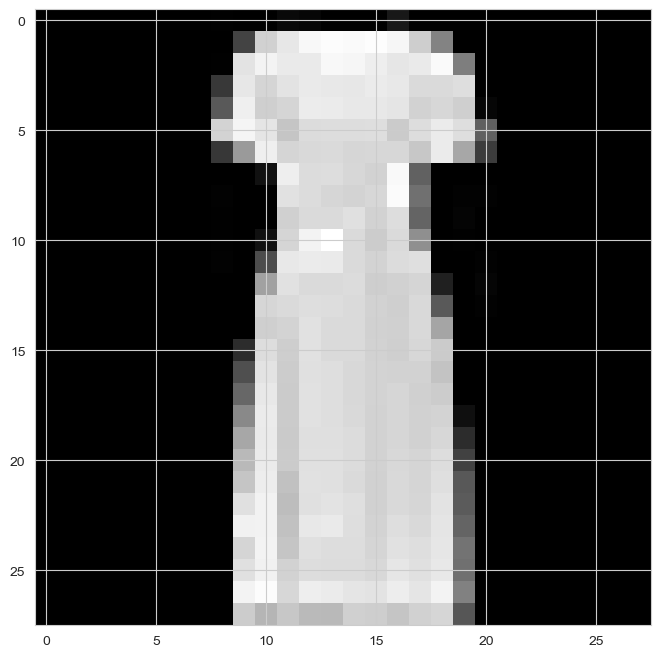

In [6]:
#Ploting the 50 image
plt.imshow(x_train[50], cmap="gray")
plt.show()

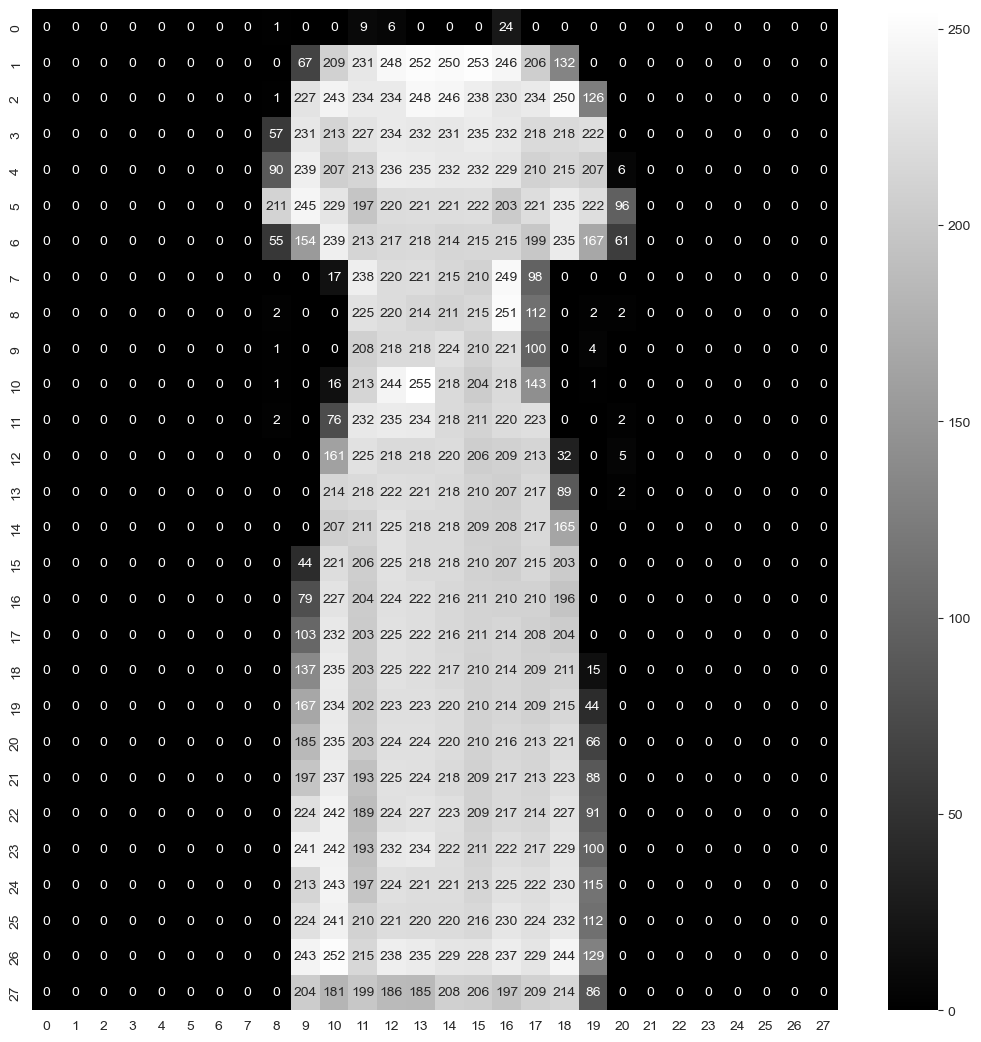

In [7]:
#Seeing the image through the heatmap
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[50], annot=True, cmap="gray", fmt=".3g")
plt.show()

In [8]:
# Checking the shape of one image
x_train[8].shape

(28, 28)

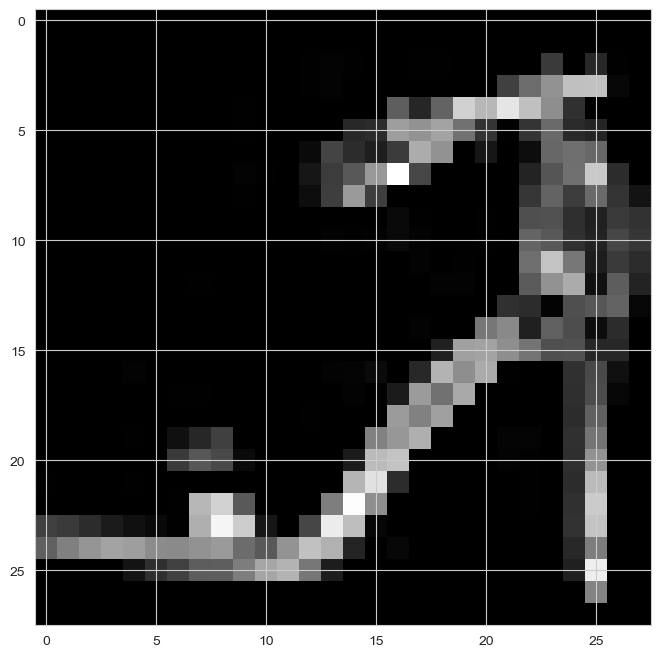

In [9]:
#Seeing the 8 image
plt.imshow(x_train[8], cmap="gray")

<Axes: >

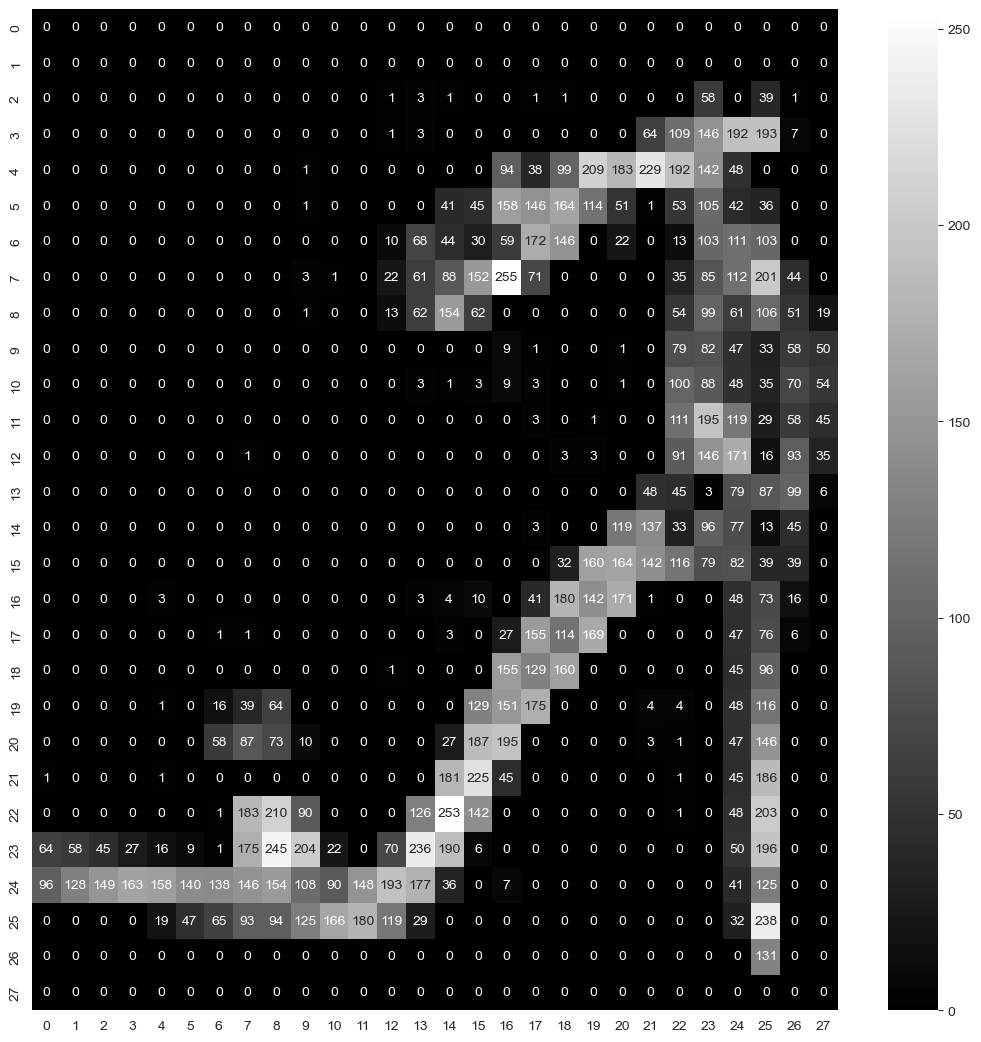

In [10]:
#Seeing the 8 image through the headmap
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[8], annot=True, cmap="gray", fmt=".3g")

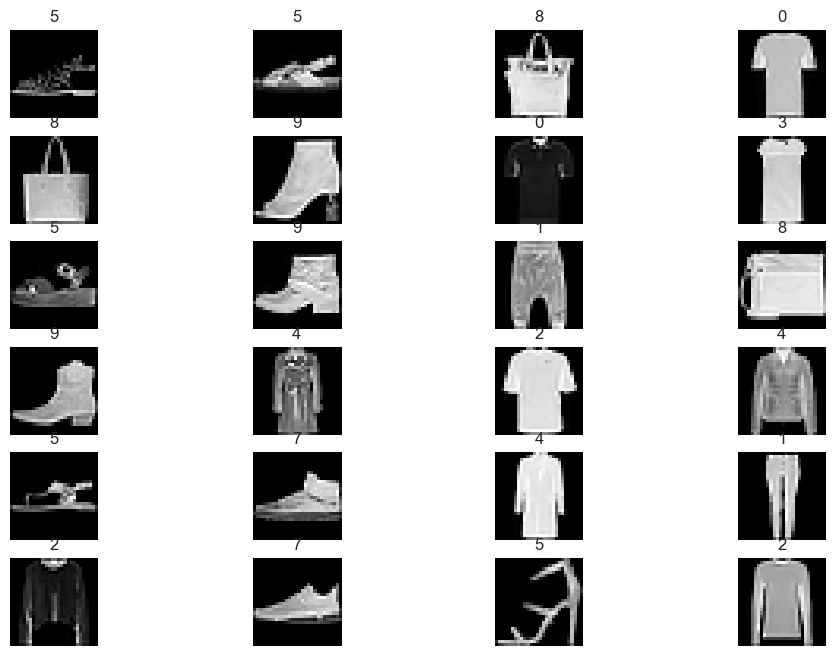

In [11]:
#Seeing different images 
c, clo = plt.subplots(6, 4, figsize=(12, 8))

for fa in clo.ravel():
    f = np.random.randint(0, len(x_train))
    fa.axis("off")
    fa.set_title(y_train[f])
    fa.imshow(x_train[f], cmap="gray")
plt.show()

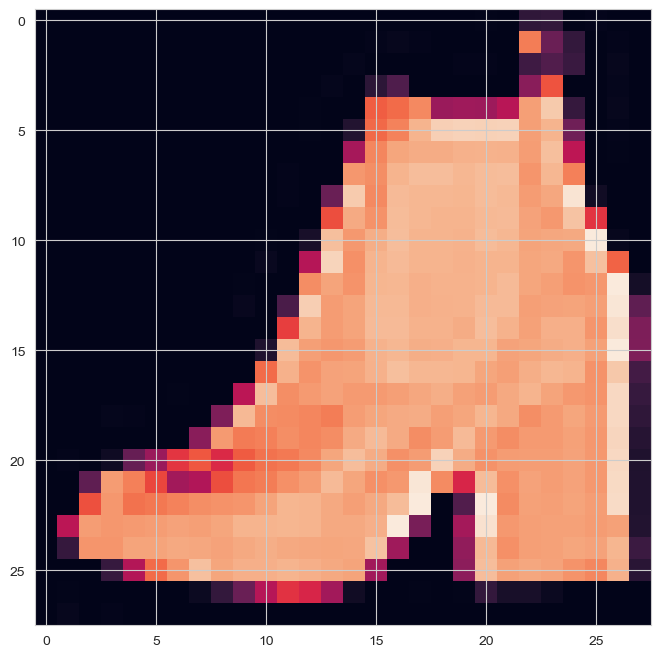

In [12]:
#Ploting the 800 image
plt.imshow(x_train[800])

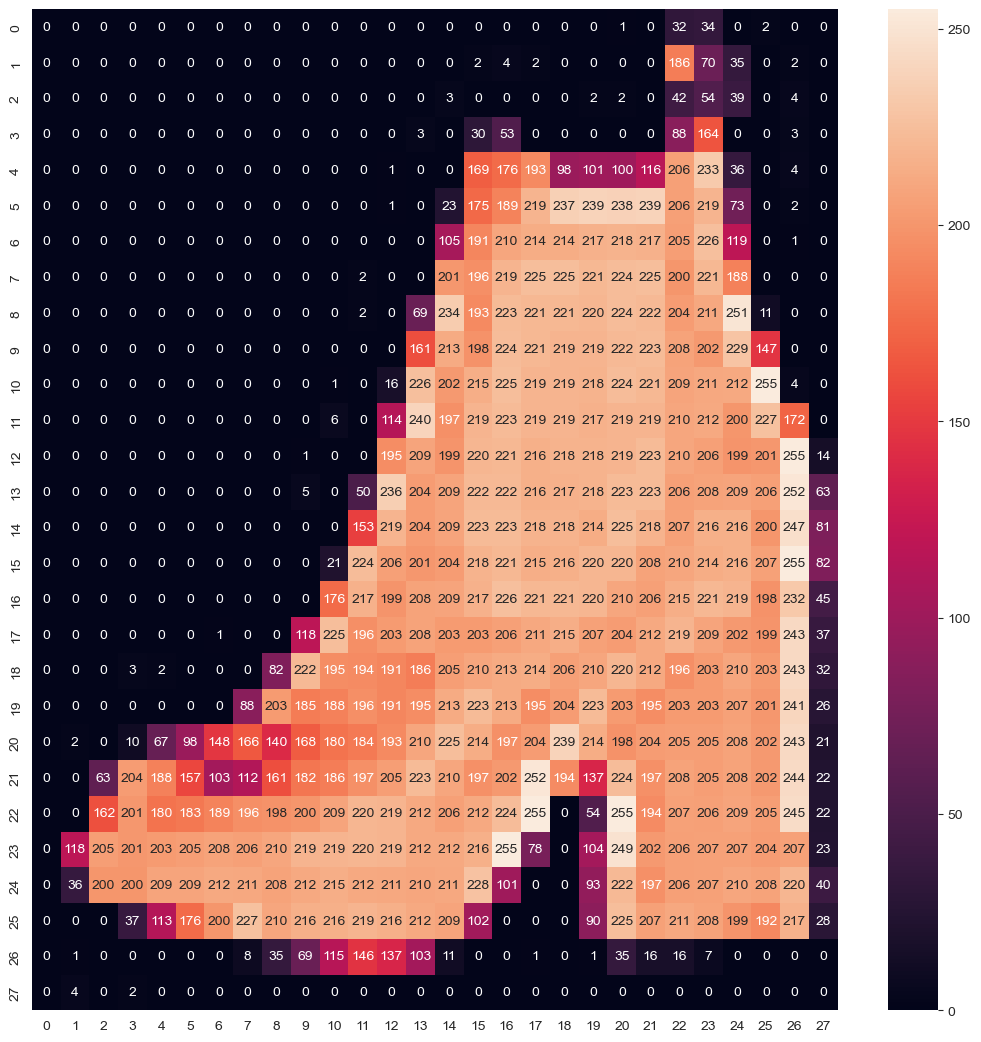

In [13]:
#Seeing the image through the heatmap
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[800], annot=True, fmt=".3g")
plt.show()

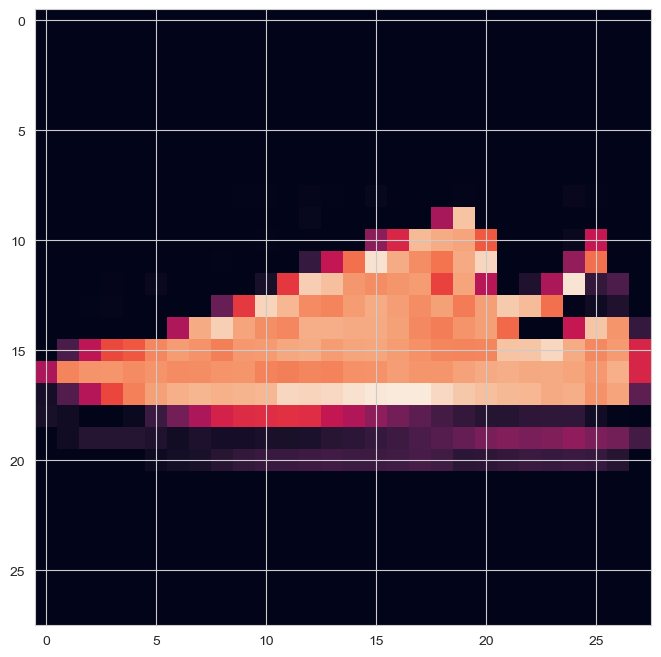

In [14]:
#Ploting the 6 image
plt.imshow(x_train[6])

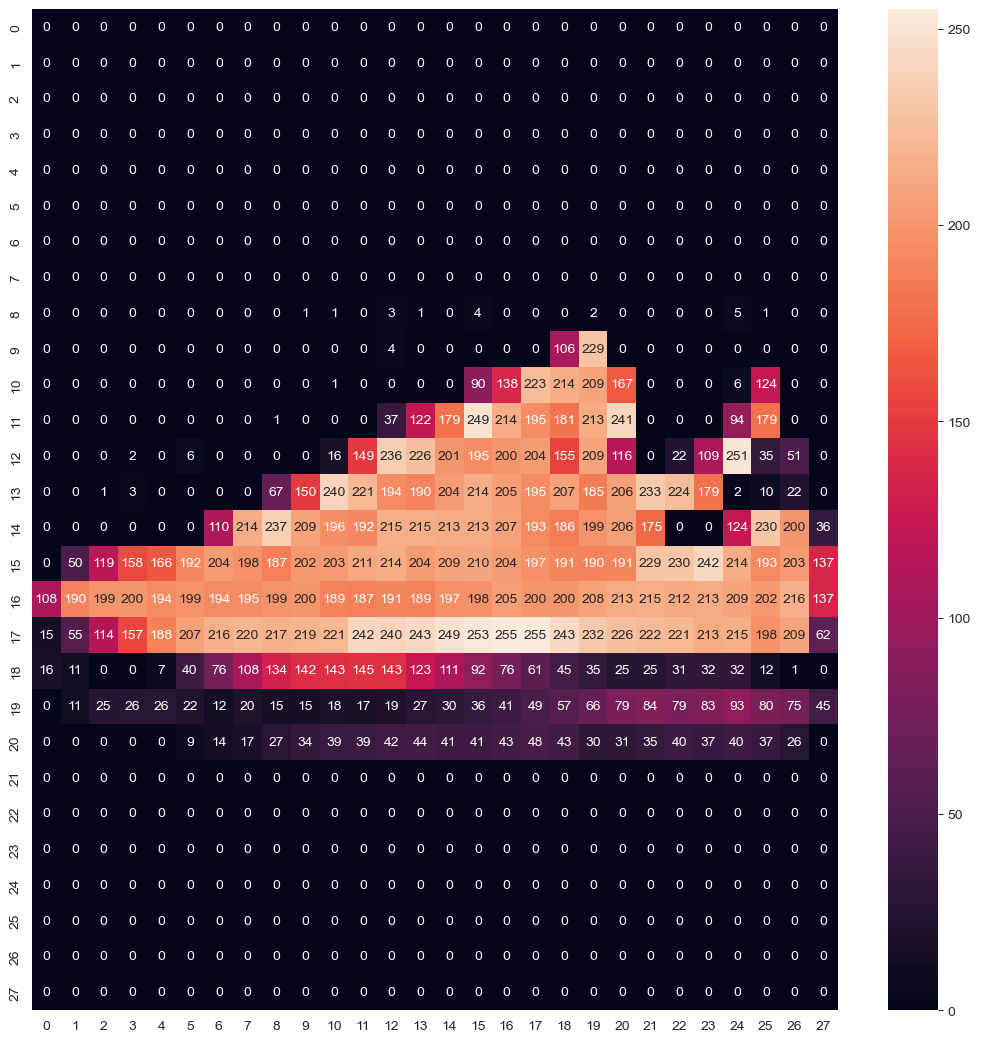

In [15]:
#Seeing the image through the heatmap
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[6], annot=True, fmt=".3g")
plt.show()

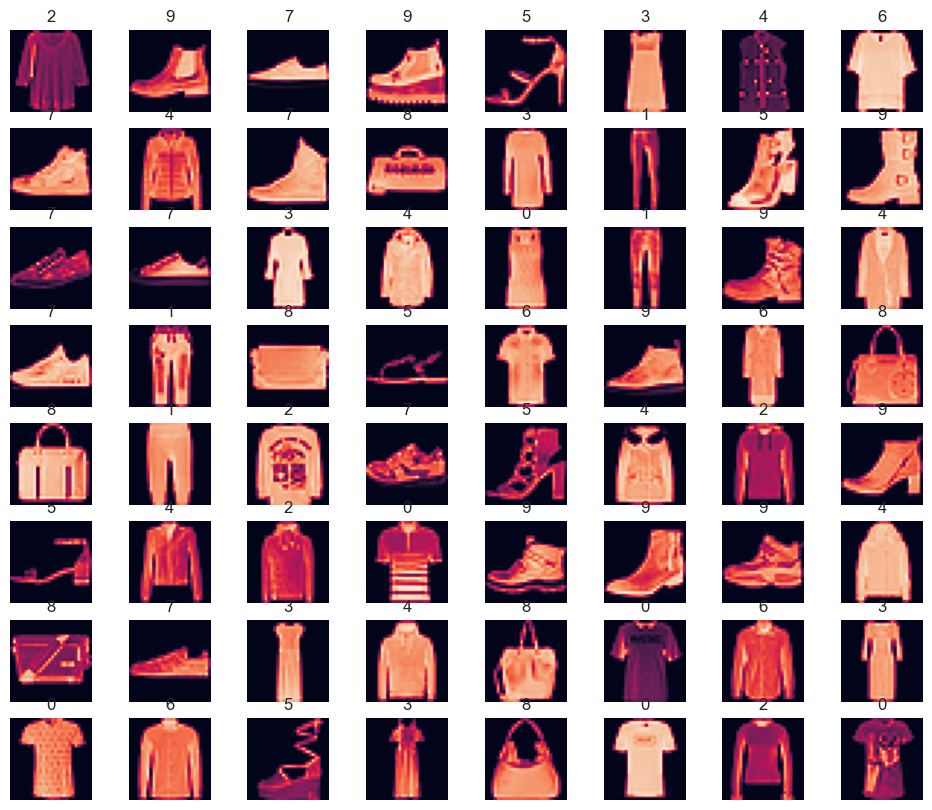

In [16]:
#Seeing different images 
c, clo = plt.subplots(8, 8, figsize=(12, 10))

for fa in clo.ravel():
    f = np.random.randint(0, len(x_train))
    fa.axis("off")
    fa.set_title(y_train[f])
    fa.imshow(x_train[f])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
#Seeing the min value of one of the values
x_train[400].min()
#As we can see, the min value is 0

0

In [18]:
#Seeing the max value of one of the values
x_train[20].max()
#As we can see, the max value is 255

255

In [19]:
# Now, I can normalize image pixels, by dividing the x_train and x_test by the max value
#Before dividing, i have to change their type to float

#Changing the type of x_train
x_train = x_train.astype("float32")
#Changing the type of x_test
x_test = x_test.astype("float32")

#Normalize x_train
x_train /= 255

#Normalize x_test
x_test /= 255

In [20]:
#Seeing the x_train after normalizing
x_train
#As we can see, it is normalized now

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [21]:
#Seeing the x_test after normalizing
x_test
#As we can see, it is normalized now

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [22]:
#Now, let's check one of the images
print('The min value is: ', x_train[100].min())
print('The max value is: ', x_train[100].max())
#As we can see, the min valu is 0, and the max value is 1 now after normalizing

The min value is:  0.0
The max value is:  1.0


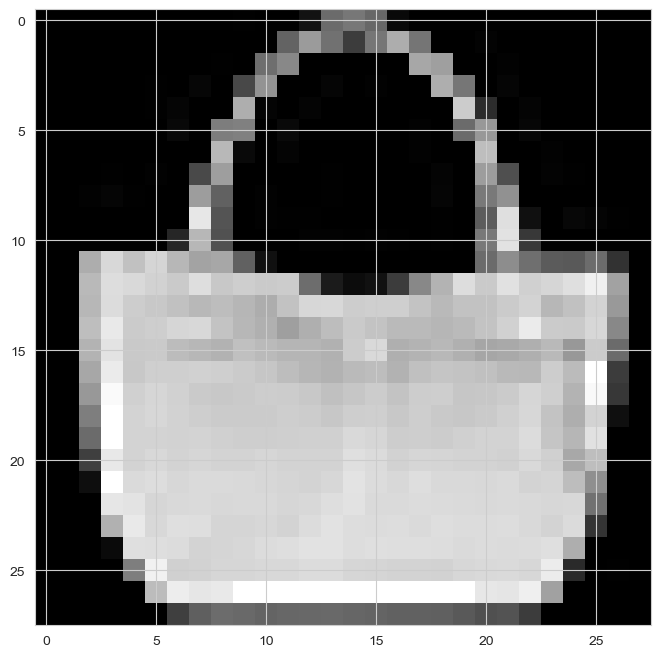

In [23]:
#Let's check if the image has affected after normalizing or not
plt.imshow(x_train[100], cmap="gray")
plt.show()
#As we can see, the image is fine

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [24]:
#Let's see the shape of x_train and x_test
x_train.shape, x_test.shape
#As we can see, the shape now contains only 3 dimension

((60000, 28, 28), (10000, 28, 28))

In [25]:
np.expand_dims(x_train, 3).shape

(60000, 28, 28, 1)

In [26]:
#let's change the shape of x_train by using numpy array. We can use expand_dims to do so
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

In [27]:
#Now, let's check if it chaged or not
x_train.shape, x_test.shape
#As we can see, the shape now is 4 dim. 

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [28]:
#Let's fist see y_train
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [29]:
#Let's see the shape of y_train
print('The shape of y_train is: ', y_train.shape)
#As we can see the shape is (60000,)

The shape of y_train is:  (60000,)


In [30]:
#Let's fist see y_test
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [31]:
#Let's see the shape of y_test
print('The shape of y_test is: ', y_test.shape)
#As we can see the shape is (10000,)

The shape of y_test is:  (10000,)


In [32]:
#Now, let's use to_categorical to convert y_train and y_test. Also, renaming them
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [33]:
#Let's see the shape of the new Y_train and Y_test
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [34]:
#Let's take a value and see it before converting
y_train[400]

2

In [35]:
#Let's take a value and see it after converting
Y_train[400]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
#The value of seed(random value)
s = 101
#The value of epochs
p = 20
#The value of batch_size
b = 32

#### Validation Data

In [37]:
#Splitting the training data to validation data
x_train, x_valid, Y_train, Y_valid = train_test_split(x_train, Y_train, 
                                                      test_size=0.2, 
                                                      stratify=Y_train, 
                                                      random_state=s, 
                                                      shuffle=True)

In [38]:
#Printing the shape of the traning and validation data
print("x_train shape -> ", x_train.shape)
print("y_train shape -> ", Y_train.shape)
print("x_valid shape -> ", x_valid.shape)
print("y_valid shape -> ", Y_valid.shape)

x_train shape ->  (48000, 28, 28, 1)
y_train shape ->  (48000, 10)
x_valid shape ->  (12000, 28, 28, 1)
y_valid shape ->  (12000, 10)


# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [39]:
#Let's now create the model

#using Sequential() to create the model
clothes_model = Sequential()

#Adding the 2D Convolutional Layer to the model, then using a filter of 28,  kernel_size=(3,3)
clothes_model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
) 

#Adding the pool_size of (2,2) strides of (1,1) to the model
clothes_model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1))) 

#Adding a flatten to the model
clothes_model.add(Flatten())

#Adding 128 Neurons and relu to the actibation
clothes_model.add(Dense(128, activation="relu"))

#For the final layer, adding 10 Neurons and a softmax activation
clothes_model.add(Dense(10, activation="softmax"))

#Compiling the model, putting categorical_crossentropy to the loss, rmsprop to optimizer, and accuracy to metrics
clothes_model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [40]:
#Seeing the summary of the model
clothes_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

##### First, I will build the model without using the validation data. and then I will use it to see the difference.

In [41]:
#Creating an early stop 
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [42]:
#Fitting the model and using early stopping on it 
clothes_model.fit(
    x_train,
    Y_train,
    batch_size=b,
    epochs=p,
    validation_data=(x_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.4093 - accuracy: 0.8558 - val_loss: 0.3091 - val_accuracy: 0.8867
Epoch 2/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2659 - accuracy: 0.9034 - val_loss: 0.3155 - val_accuracy: 0.8881
Epoch 3/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2210 - accuracy: 0.9181 - val_loss: 0.2674 - val_accuracy: 0.9040
Epoch 4/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1885 - accuracy: 0.9306 - val_loss: 0.2804 - val_accuracy: 0.9063
Epoch 5/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1642 - accuracy: 0.9405 - val_loss: 0.2687 - val_accuracy: 0.9082
Epoch 6/20
1500/1500 [==============================] - 37s 24ms/step - loss: 0.1430 - accuracy: 0.9498 - val_loss: 0.2692 - val_accuracy: 0.9109
Epoch 7/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.1244 - accuracy: 0.9555 - val_loss: 0.2904 -

In [43]:
#The shape of x_train
x_train.shape

(48000, 28, 28, 1)

In [44]:
#The shape of Y_train
Y_train.shape

(48000, 10)

**TASK 7: Plot values of metrics you used in your model.**

In [45]:
#Seeing the metrics of the model
clothes_model.metrics_names

['loss', 'accuracy']

In [46]:
#Seeing the history of the model
clothes_model.history.history

{'loss': [0.4093058407306671,
  0.2658822536468506,
  0.2210031896829605,
  0.18854762613773346,
  0.1641855537891388,
  0.1430409699678421,
  0.12442899495363235,
  0.10856177657842636,
  0.09631341695785522,
  0.08257903158664703,
  0.07275495678186417],
 'accuracy': [0.8558124899864197,
  0.9034166932106018,
  0.9180833101272583,
  0.9305624961853027,
  0.940458357334137,
  0.949833333492279,
  0.9555208086967468,
  0.961312472820282,
  0.965749979019165,
  0.9699583053588867,
  0.9741250276565552],
 'val_loss': [0.30907967686653137,
  0.3154508173465729,
  0.26737967133522034,
  0.2804126739501953,
  0.268708199262619,
  0.2692321538925171,
  0.2903817296028137,
  0.32688969373703003,
  0.3586317300796509,
  0.40396538376808167,
  0.40496739745140076],
 'val_accuracy': [0.8866999745368958,
  0.8881000280380249,
  0.9039999842643738,
  0.9063000082969666,
  0.9082000255584717,
  0.9108999967575073,
  0.916100025177002,
  0.9056000113487244,
  0.9089000225067139,
  0.904699981212616,

In [47]:
#Creating a dataframe of the history of the model
history = pd.DataFrame(clothes_model.history.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.409,0.856,0.309,0.887
1,0.266,0.903,0.315,0.888
2,0.221,0.918,0.267,0.904
3,0.189,0.931,0.280,0.906
4,0.164,0.940,0.269,0.908


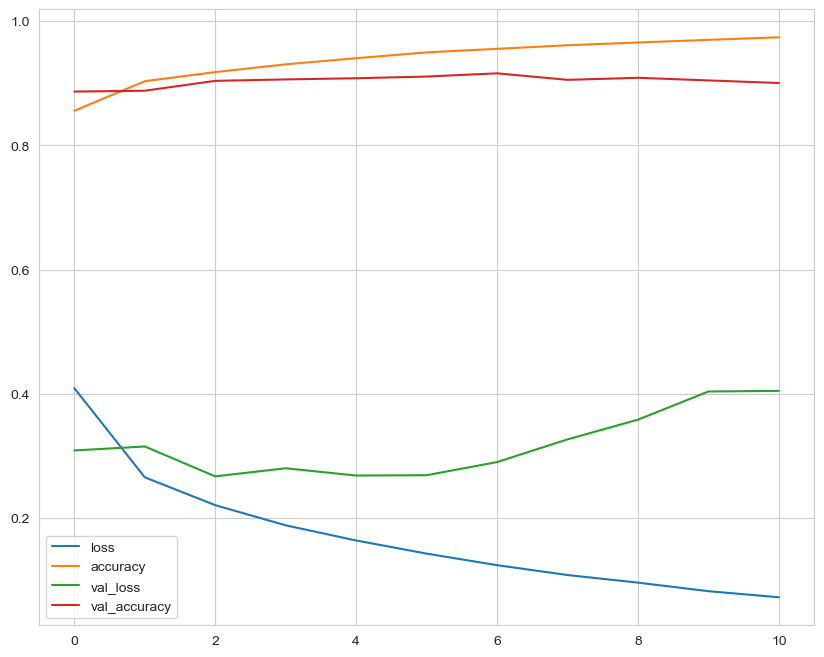

In [48]:
#Plotting the history of the model
history.plot();

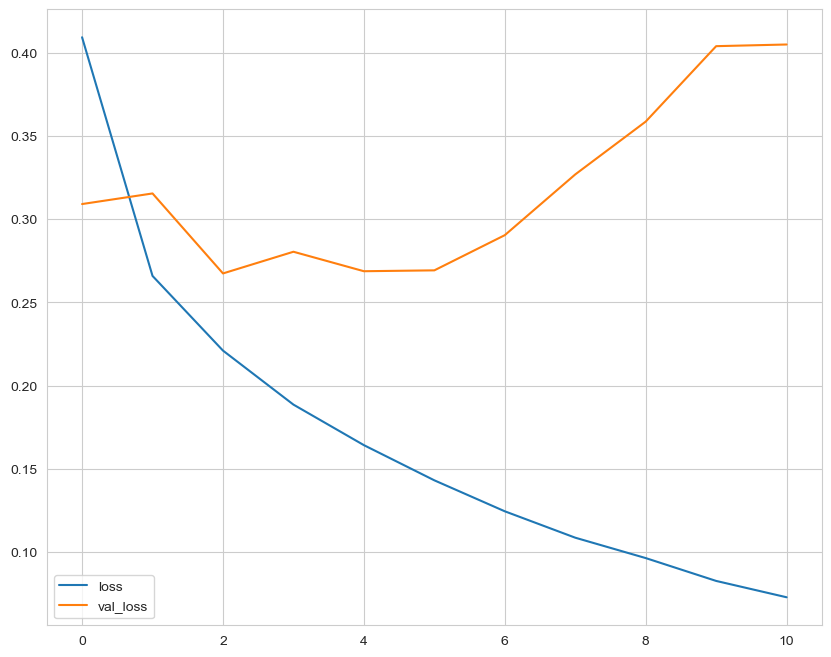

In [49]:
#Seeing loss and val_loss from the graph
history[["loss", "val_loss"]].plot()
plt.show()

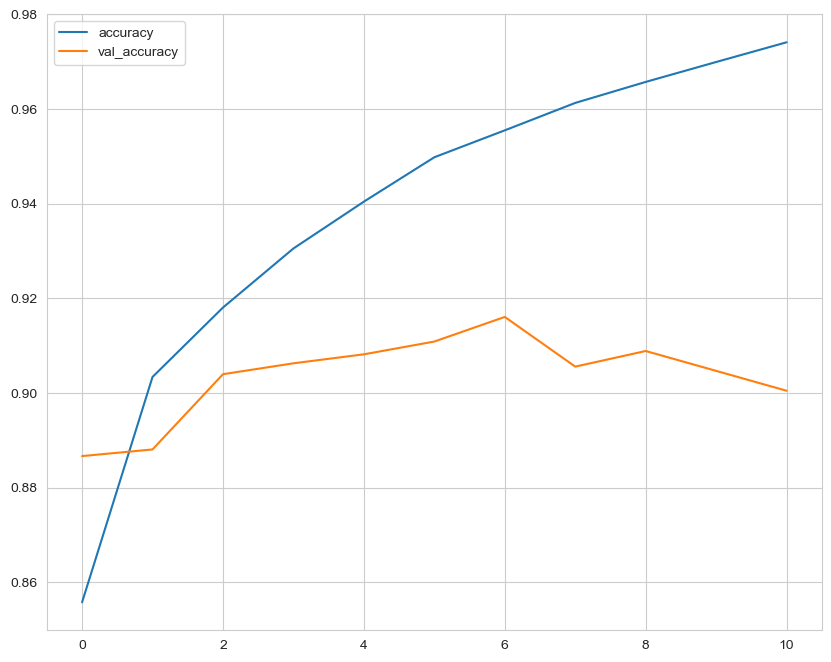

In [50]:
#Seeing the accuracy and val_accuracy from the graph
history[["accuracy", "val_accuracy"]].plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [51]:
#Evaluating the model of x_test and Y_test
clothes_model.evaluate(x_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2904 - accuracy: 0.9161


[0.2903817296028137, 0.916100025177002]

In [52]:
#Seeing the scores of the model
model_score = clothes_model.evaluate(x_test, Y_test, verbose=0)
print("Test loss:", model_score[0])
print("Test accuracy:", model_score[1])

Test loss: 0.2903817296028137
Test accuracy: 0.916100025177002


In [53]:
#Seeing the predicted values of the model
pred = clothes_model.predict(x_test)
pred

313/313 [==============================] - 2s 7ms/step


array([[0.        , 0.        , 0.00000008, ..., 0.00001395, 0.        ,
        0.99998534],
       [0.00000147, 0.        , 0.99999857, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00000006, ..., 0.00000005, 0.9999981 ,
        0.        ],
       [0.        , 0.9999999 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00000124, 0.00000012, 0.00000171, ..., 0.00302274, 0.00019723,
        0.000336  ]], dtype=float32)

In [54]:
#Seeing the shape of the predicted values
pred.shape

(10000, 10)

In [55]:
#Seeing the first value of the predicted value
pred[0]

array([0.        , 0.        , 0.00000008, 0.        , 0.00000049,
       0.00000009, 0.        , 0.00001395, 0.        , 0.99998534],
      dtype=float32)

In [56]:
np.argmax(pred[0])

9

In [57]:
y_pred = np.argmax(pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [58]:
#The shape of y_pred
y_pred.shape

(10000,)

In [59]:
#Printing the classification_report of y_test and y_pred
print(classification_report(y_test, y_pred))
#The result is good, but it seems for class 6 is not that good compared to the others. also, class 0, 2, 4 they are less than the others. 
#but class 6 is the worst one

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.86      0.86      1000
           3       0.90      0.93      0.91      1000
           4       0.84      0.90      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.82      0.71      0.76      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [60]:
#Printing the confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[892   0  22  17   2   1  56   0  10   0]
 [  1 977   2  15   2   0   2   0   1   0]
 [ 16   0 863  10  63   0  48   0   0   0]
 [ 10   7   8 929  24   0  22   0   0   0]
 [  2   1  48  28 896   0  25   0   0   0]
 [  0   0   0   0   0 966   0  19   0  15]
 [119   0  53  32  77   0 712   0   7   0]
 [  0   0   0   0   0   5   0 967   0  28]
 [  0   1   1   5   1   1   6   2 983   0]
 [  0   0   0   0   0   3   0  21   0 976]]


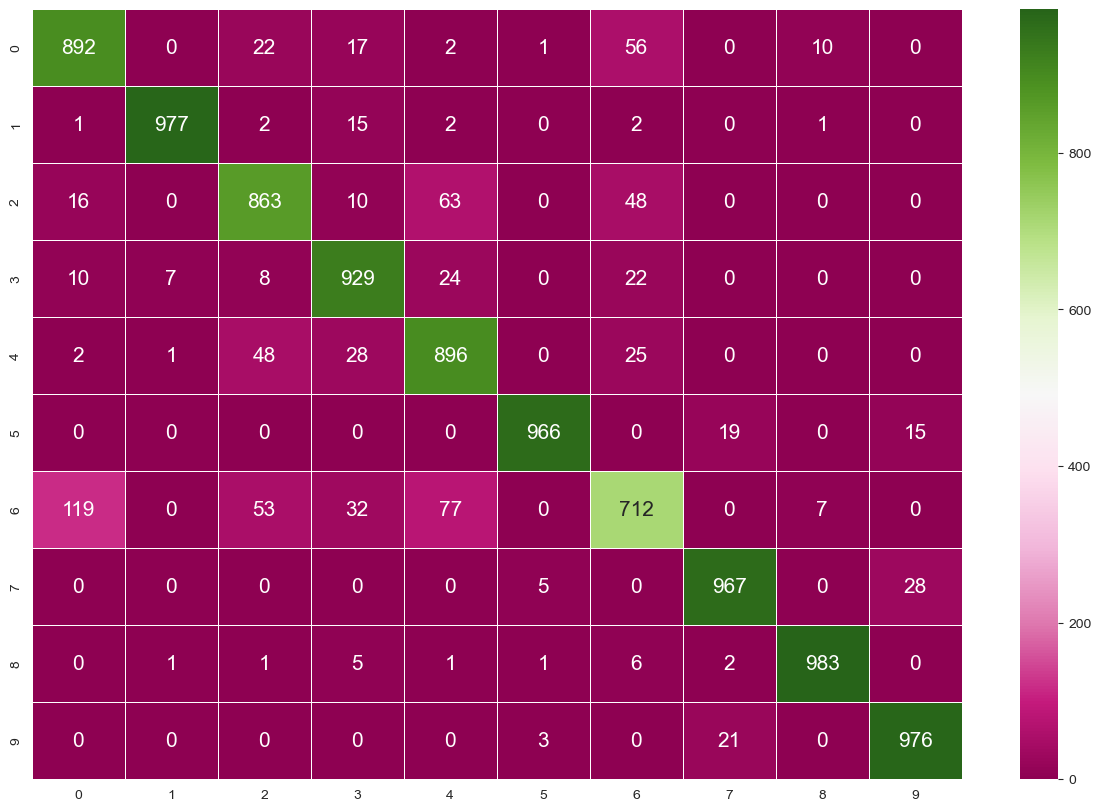

In [61]:
#Plotting the confusion_matrix by using the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="PiYG",
    linewidths=0.5,
    linecolor="white",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()
#We can see from the graph, in class 6, there are a lot of uncorrect predictions. and also, in class 0, there are some uncorrect predictions
#Furthermore, in class 2, and 4 are the same as well

In [62]:
#Seeing the values that predicted wrong
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [63]:
#Seeing the sum of the values that predicted wrong
np.not_equal(y_test, y_pred).sum()

839

In [64]:
#Seeing the values that predicted correct
np.equal(y_test, y_pred).sum()

9161

## Prediction

In [65]:
#Creating a value to predict
fashion = x_test[9]

In [66]:
#Seeing the shape of the value
fashion.shape

(28, 28, 1)

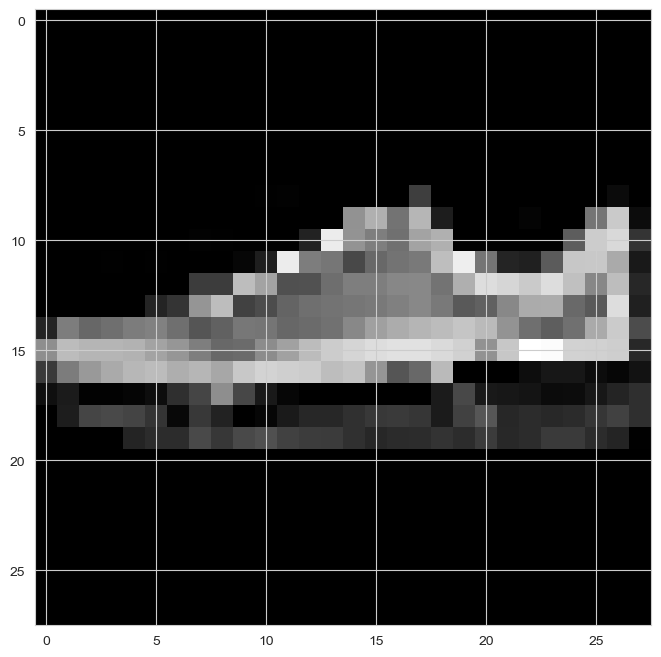

In [67]:
#Plotting the value
plt.imshow(fashion, cmap="gray")
plt.show()

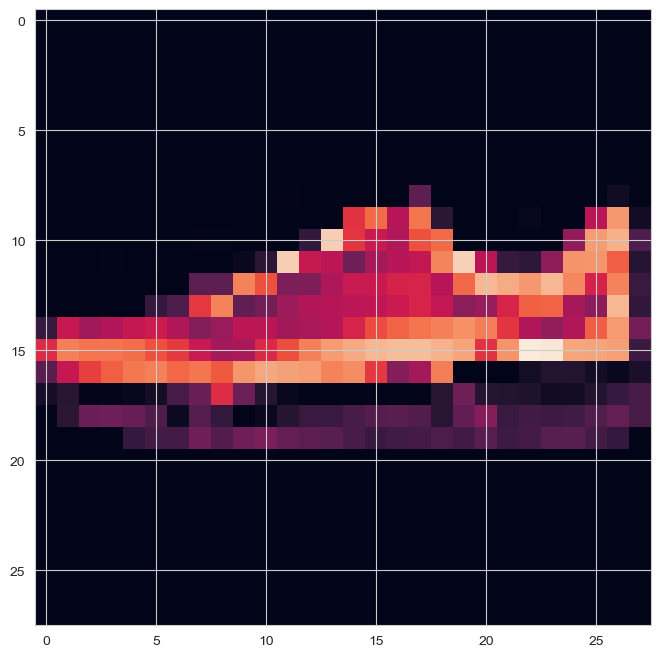

In [68]:
#Plotting the value
plt.imshow(fashion)
plt.show()

In [69]:
#Changing the dim of the value
np.expand_dims(fashion, 0).shape

(1, 28, 28, 1)

In [70]:
#Predicting the value
pred_fashion = clothes_model.predict(np.expand_dims(fashion, 0))
pred_fashion

1/1 [==============================] - 0s 23ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [71]:
y_pred = np.argmax(pred_fashion)
y_pred

7

In [72]:
#Saving the model
clothes_model.save("clothes.h5")

C:\Users\habob\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [73]:
#Fitching the model to use it for prediction
pre_model = tf.keras.models.load_model("clothes.h5")

In [74]:
#Changing the dim of the predicted value
pred_fashion = pre_model.predict(np.expand_dims(x_test[400], 0))

1/1 [==============================] - 0s 85ms/step


In [75]:
np.argmax(pred_fashion)

0

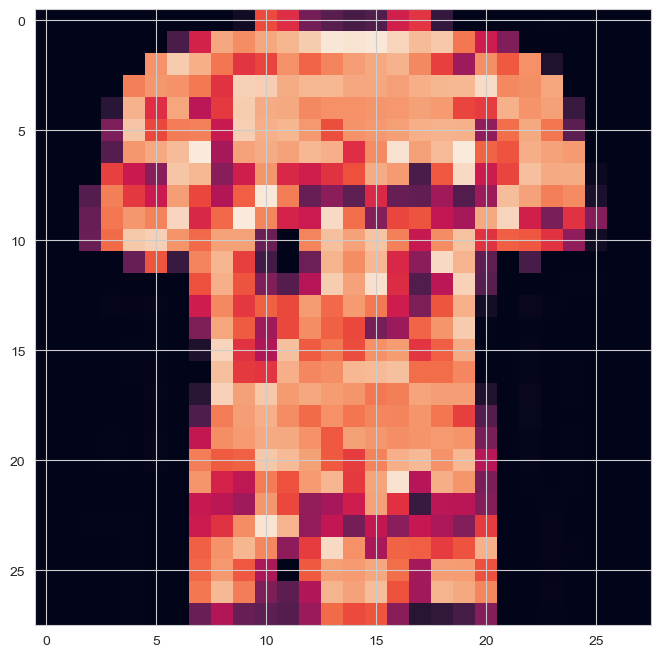

In [76]:
#Seeing the image of the predicted value
plt.imshow(x_test[400].reshape(28, 28))
plt.show()

In [77]:
#Changing the dim of the predicted value
pred_fashion2 = pre_model.predict(np.expand_dims(x_test[1000], 0))

1/1 [==============================] - 0s 40ms/step


In [78]:
np.argmax(pred_fashion2)

6

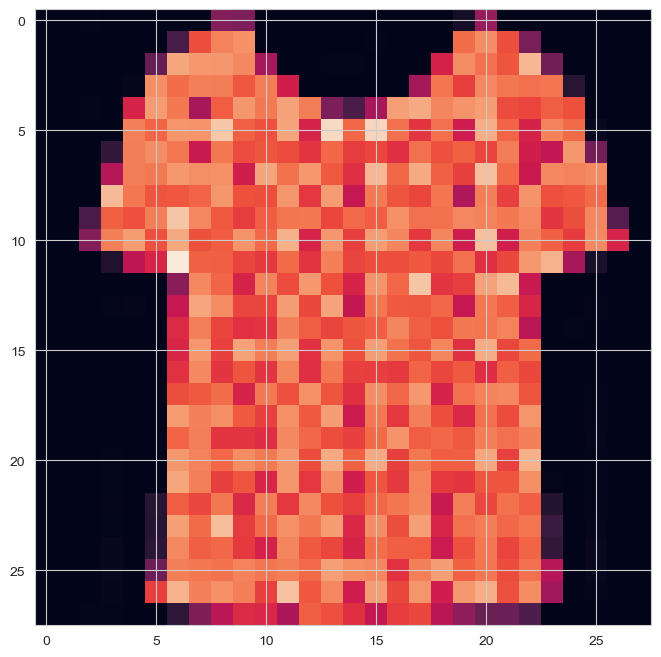

In [79]:
#Seeing the image of the predicted value
plt.imshow(x_test[1000].reshape(28, 28))
plt.show()

In [80]:
#Changing the dim of the predicted value
pred_fashion3 = pre_model.predict(np.expand_dims(x_test[5000], 0))

1/1 [==============================] - 0s 31ms/step


In [81]:
np.argmax(pred_fashion3)

2

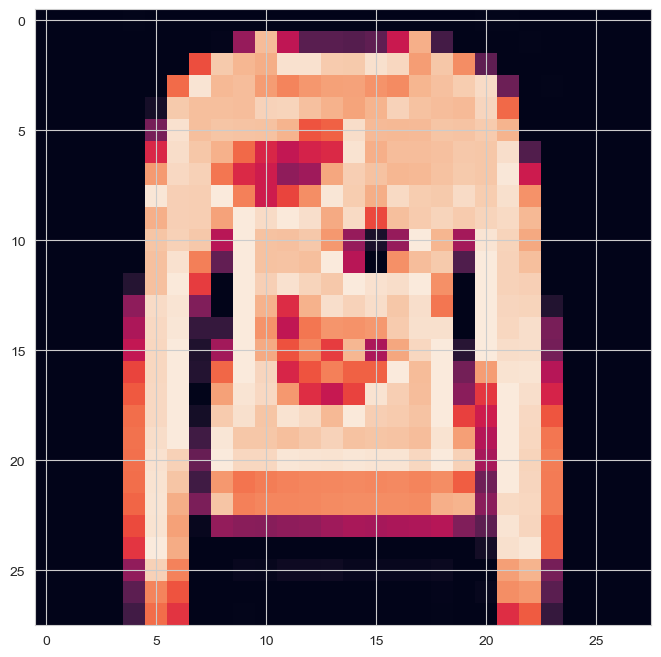

In [82]:
#Seeing the image of the predicted value
plt.imshow(x_test[5000].reshape(28, 28))
plt.show()

# Doing the same steps by using validation data

Now, I am going to do the same thing, but with validation data.

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [83]:
#Let's now create the model

#using Sequential() to create the model
clothes_model2 = Sequential()

#Adding the 2D Convolutional Layer to the model, then using a filter of 28,  kernel_size=(3,3)
clothes_model2.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
) 

#Adding the pool_size of (2,2) strides of (1,1) to the model
clothes_model2.add(MaxPool2D(pool_size=(2, 2), strides=(1,1))) 

#Adding a flatten to the model
clothes_model2.add(Flatten())

#Adding 128 Neurons and relu to the actibation
clothes_model2.add(Dense(128, activation="relu"))

#For the final layer, adding 10 Neurons and a softmax activation
clothes_model2.add(Dense(10, activation="softmax"))

#Compiling the model, putting categorical_crossentropy to the loss, rmsprop to optimizer, and accuracy to metrics
clothes_model2.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [84]:
#Seeing the summary of the model
clothes_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2240128   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [85]:
#Creating an early stop 
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [86]:
#Fitting the model and using early stopping on it 
clothes_model2.fit(
    x_train,
    Y_train,
    batch_size=b,
    epochs=p,
    validation_data=(x_valid, Y_valid),
    callbacks=[early_stop],
)

Epoch 1/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.4066 - accuracy: 0.8559 - val_loss: 0.3313 - val_accuracy: 0.8791
Epoch 2/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2648 - accuracy: 0.9030 - val_loss: 0.2914 - val_accuracy: 0.8946
Epoch 3/20
1500/1500 [==============================] - 43s 28ms/step - loss: 0.2194 - accuracy: 0.9193 - val_loss: 0.2800 - val_accuracy: 0.9028
Epoch 4/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.1885 - accuracy: 0.9308 - val_loss: 0.2780 - val_accuracy: 0.9019
Epoch 5/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.1630 - accuracy: 0.9399 - val_loss: 0.2573 - val_accuracy: 0.9105
Epoch 6/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.1418 - accuracy: 0.9489 - val_loss: 0.2887 - val_accuracy: 0.9082
Epoch 7/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.1239 - accuracy: 0.9555 - val_loss: 0.2825 -

In [87]:
#The shape of x_train
x_train.shape

(48000, 28, 28, 1)

In [88]:
#The shape of Y_train
Y_train.shape

(48000, 10)

**TASK 7: Plot values of metrics you used in your model.**

In [89]:
#Seeing the metrics of the model
clothes_model2.metrics_names

['loss', 'accuracy']

In [90]:
#Seeing the history of the model
clothes_model2.history.history

{'loss': [0.40657708048820496,
  0.2648047208786011,
  0.21944640576839447,
  0.1884649097919464,
  0.16303583979606628,
  0.1418202519416809,
  0.12389957904815674,
  0.10810907185077667,
  0.09371422976255417,
  0.08150912821292877,
  0.07272081822156906],
 'accuracy': [0.8558541536331177,
  0.9030208587646484,
  0.9193124771118164,
  0.9307708144187927,
  0.9399374723434448,
  0.9488541483879089,
  0.9554583430290222,
  0.9605208039283752,
  0.9666666388511658,
  0.9711250066757202,
  0.9744374752044678],
 'val_loss': [0.3312773108482361,
  0.29141518473625183,
  0.2799898684024811,
  0.27797767519950867,
  0.25731635093688965,
  0.2886806130409241,
  0.28246957063674927,
  0.2911398410797119,
  0.3323841989040375,
  0.3534414768218994,
  0.3619935214519501],
 'val_accuracy': [0.8790833353996277,
  0.8945833444595337,
  0.9027500152587891,
  0.9019166827201843,
  0.9104999899864197,
  0.9082499742507935,
  0.9154166579246521,
  0.9130833148956299,
  0.9084166884422302,
  0.905749976

In [91]:
#Creating a dataframe of the history of the model
history2 = pd.DataFrame(clothes_model2.history.history)
history2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.407,0.856,0.331,0.879
1,0.265,0.903,0.291,0.895
2,0.219,0.919,0.280,0.903
3,0.188,0.931,0.278,0.902
4,0.163,0.940,0.257,0.910


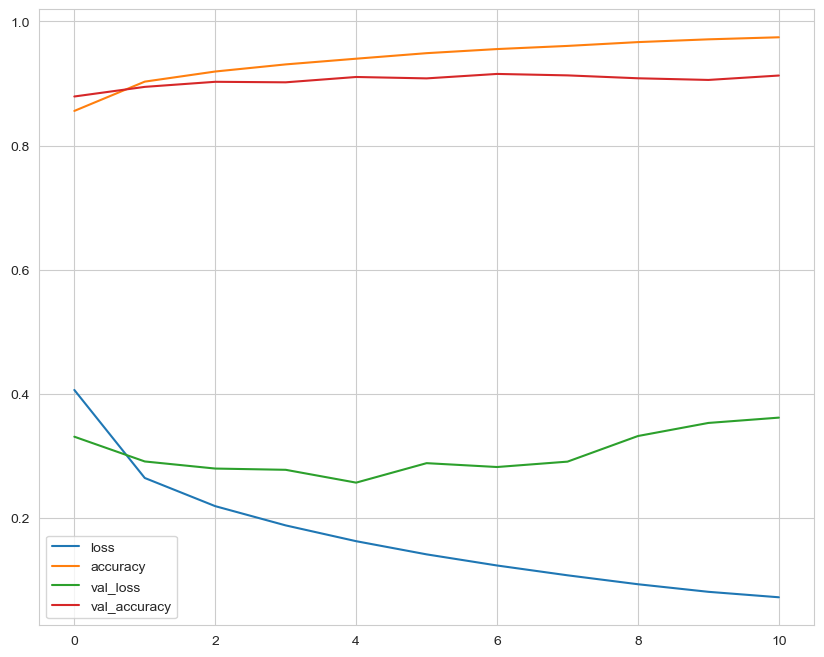

In [92]:
#Plotting the history of the model
history2.plot();

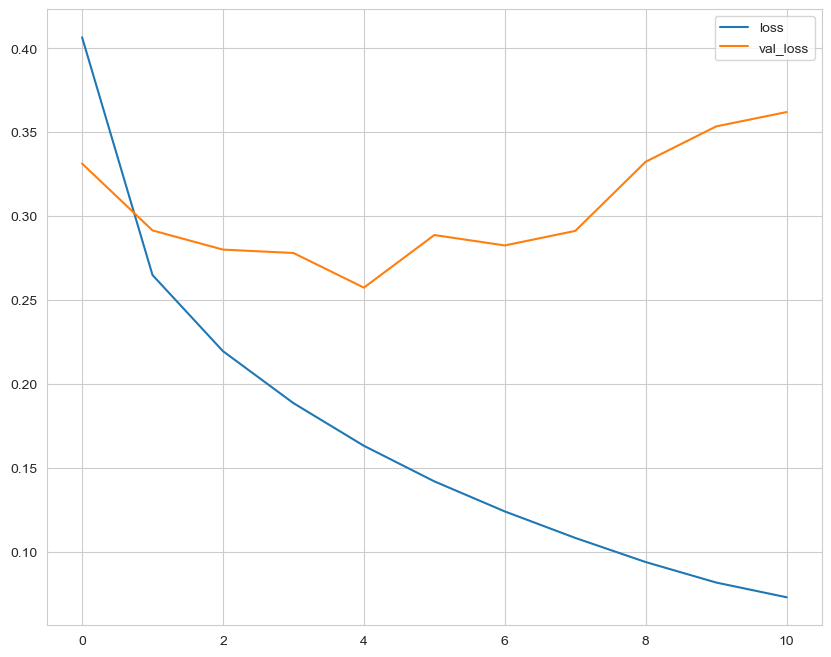

In [93]:
#Seeing loss and val_loss from the graph
history2[["loss", "val_loss"]].plot()
plt.show()

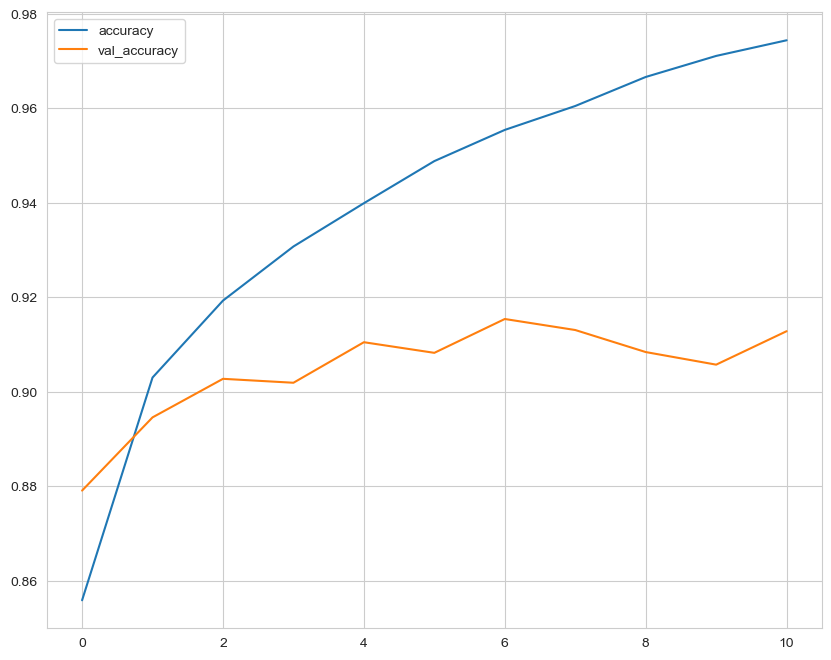

In [94]:
#Seeing the accuracy and val_accuracy from the graph
history2[["accuracy", "val_accuracy"]].plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [95]:
#Evaluating the model of x_test and Y_test
clothes_model2.evaluate(x_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3094 - accuracy: 0.9064


[0.3094151020050049, 0.9064000248908997]

In [96]:
#Seeing the scores of the model
model_score2 = clothes_model2.evaluate(x_test, Y_test, verbose=0)
print("Test loss:", model_score2[0])
print("Test accuracy:", model_score2[1])

Test loss: 0.3094151020050049
Test accuracy: 0.9064000248908997


In [97]:
#Seeing the predicted values of the model
pred2 = clothes_model2.predict(x_test)
pred2

313/313 [==============================] - 2s 6ms/step


array([[0.        , 0.        , 0.0000002 , ..., 0.00013844, 0.        ,
        0.9998543 ],
       [0.00000003, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999094,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00004754, 0.00000045, 0.00008402, ..., 0.12264073, 0.00017377,
        0.00744633]], dtype=float32)

In [98]:
#Seeing the shape of the predicted values
pred2.shape

(10000, 10)

In [99]:
#Seeing the first value of the predicted value
pred2[0]

array([0.        , 0.        , 0.0000002 , 0.        , 0.00000003,
       0.00000702, 0.00000001, 0.00013844, 0.        , 0.9998543 ],
      dtype=float32)

In [100]:
np.argmax(pred2[0])

9

In [101]:
y_pred2 = np.argmax(pred2, axis=1)
y_pred2

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [102]:
#The shape of y_pred
y_pred2.shape

(10000,)

In [103]:
#Printing the classification_report of y_test and y_pred
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.91      0.80      0.85      1000
           3       0.92      0.91      0.91      1000
           4       0.78      0.92      0.85      1000
           5       0.98      0.97      0.97      1000
           6       0.73      0.77      0.75      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [104]:
#Printing the confusion_matrix
print(confusion_matrix(y_test, y_pred2))

[[797   1  13  12   7   2 159   0   9   0]
 [  0 975   0  16   3   0   2   0   4   0]
 [ 16   0 802   8 115   1  57   0   1   0]
 [ 10   2   8 906  42   0  32   0   0   0]
 [  3   1  26  15 923   1  31   0   0   0]
 [  0   0   0   0   0 969   0  17   0  14]
 [ 68   1  35  26  89   0 774   0   7   0]
 [  0   0   0   0   0  12   0 974   0  14]
 [  2   1   1   3   1   1   3   5 983   0]
 [  0   0   0   0   0   4   0  35   0 961]]


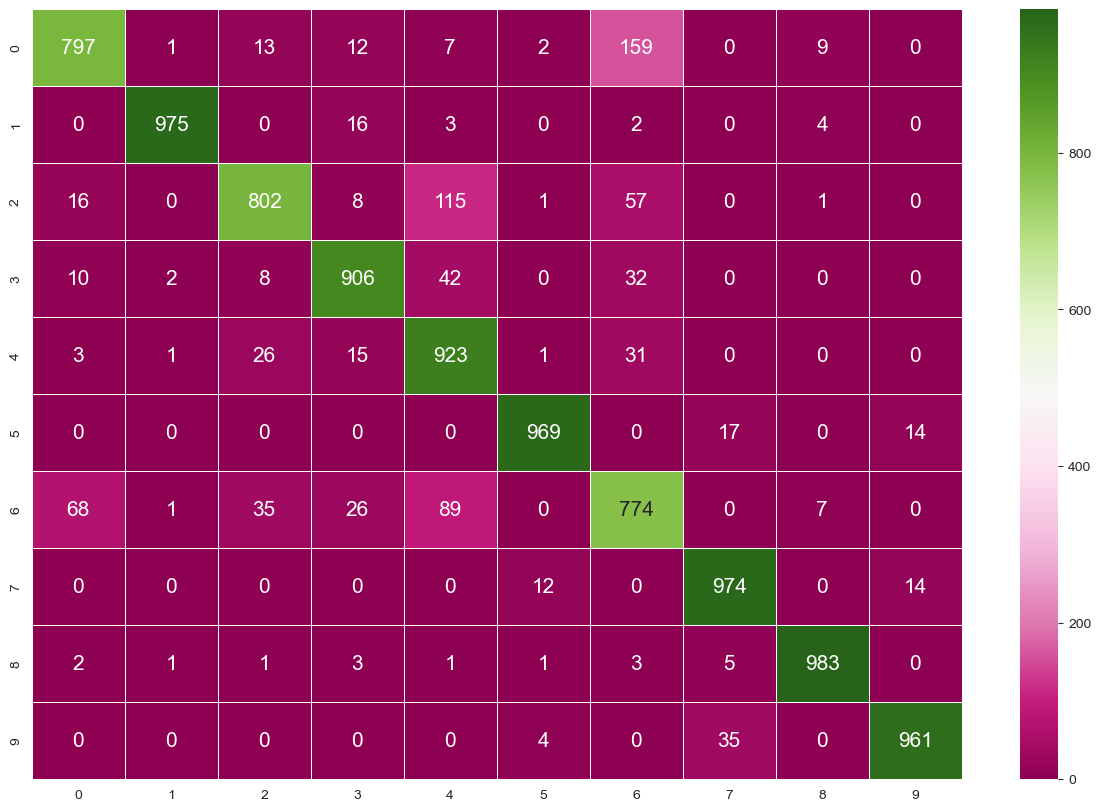

In [105]:
#Plotting the confusion_matrix by using the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred2),
    annot=True,
    cmap="PiYG",
    linewidths=0.5,
    linecolor="white",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [106]:
#Seeing the values that predicted wrong
np.not_equal(y_test, y_pred2)

array([False, False, False, ..., False, False, False])

In [107]:
#Seeing the sum of the values that predicted wrong
np.not_equal(y_test, y_pred2).sum()

936

In [108]:
#Seeing the values that predicted correct
np.equal(y_test, y_pred2).sum()

9064

## Prediction

In [109]:
#Creating a value to predict
fashions = x_test[9]

In [110]:
#Seeing the shape of the value
fashions.shape

(28, 28, 1)

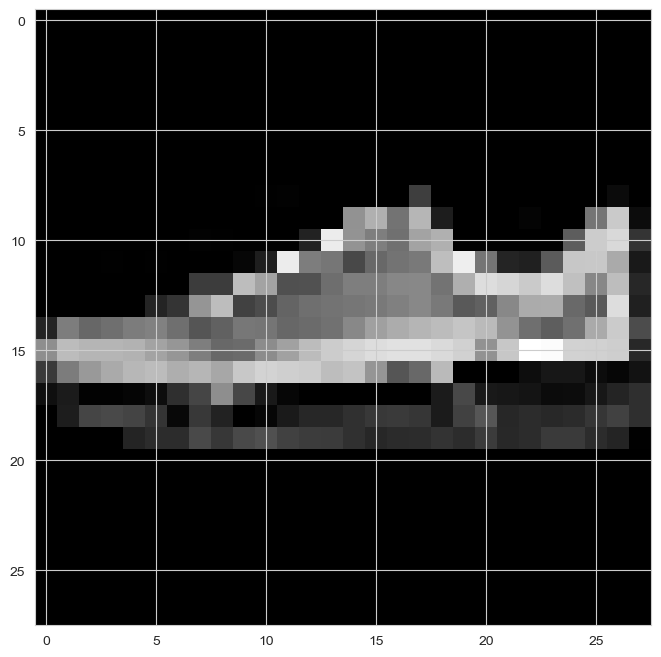

In [111]:
#Plotting the value
plt.imshow(fashions, cmap="gray")
plt.show()

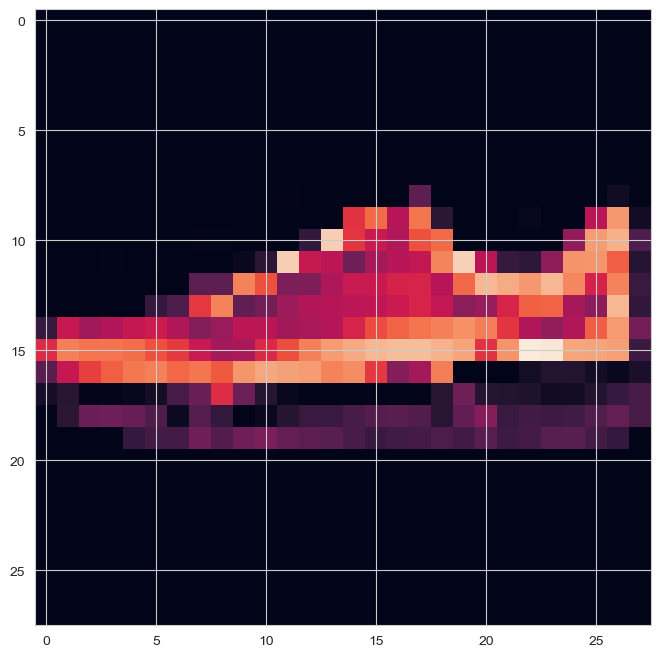

In [112]:
#Plotting the value
plt.imshow(fashions)
plt.show()

In [113]:
#Changing the dim of the value
np.expand_dims(fashions, 0).shape

(1, 28, 28, 1)

In [114]:
#Predicting the value
pred_fashions = clothes_model.predict(np.expand_dims(fashions, 0))
pred_fashions

1/1 [==============================] - 0s 29ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [115]:
y_pred2 = np.argmax(pred_fashions)
y_pred2

7

In [116]:
#Saving the model
clothes_model2.save("clothes2.h5")

C:\Users\habob\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [117]:
#Fitching the model to use it for prediction
pre_model2 = tf.keras.models.load_model("clothes2.h5")

In [118]:
#Changing the dim of the predicted value
pred_fashion2 = pre_model2.predict(np.expand_dims(x_test[400], 0))

1/1 [==============================] - 0s 66ms/step


In [119]:
np.argmax(pred_fashions)

7

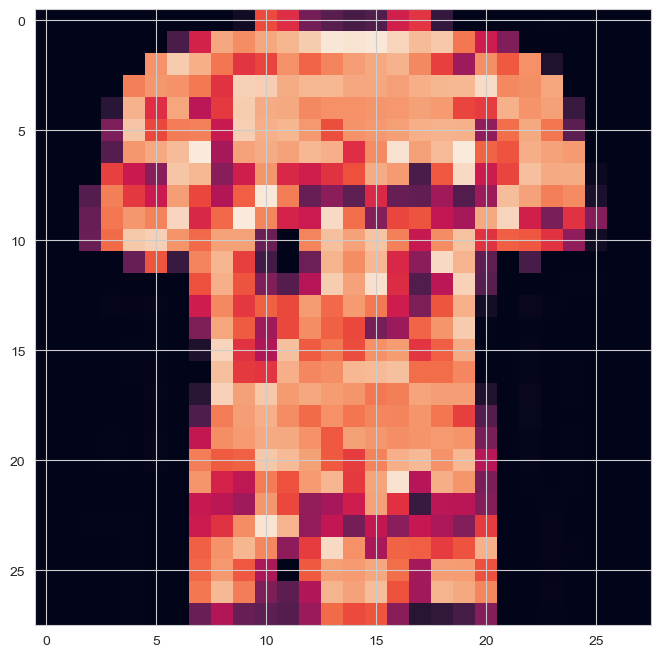

In [120]:
#Seeing the image of the predicted value
plt.imshow(x_test[400].reshape(28, 28))
plt.show()

In [121]:
#Changing the dim of the predicted value
pred_fashions2 = pre_model2.predict(np.expand_dims(x_test[1000], 0))

1/1 [==============================] - 0s 24ms/step


In [122]:
np.argmax(pred_fashions2)

6

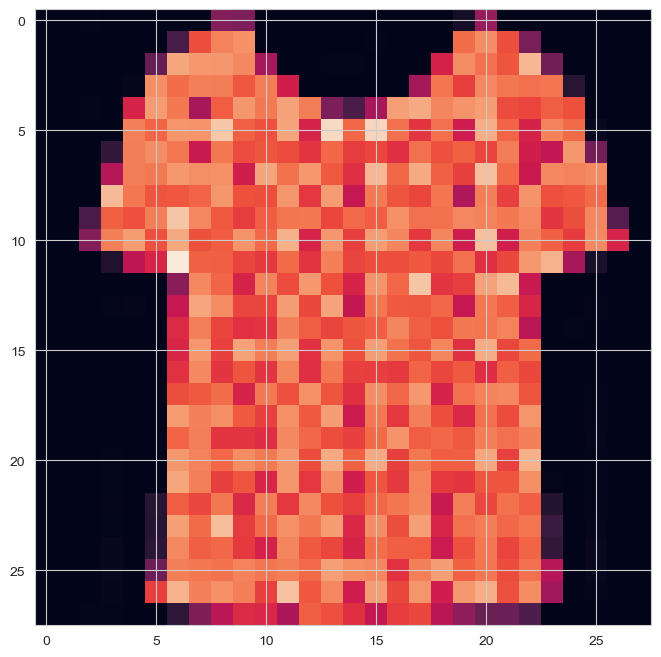

In [123]:
#Seeing the image of the predicted value
plt.imshow(x_test[1000].reshape(28, 28))
plt.show()

In [124]:
#Changing the dim of the predicted value
pred_fashions3 = pre_model2.predict(np.expand_dims(x_test[5000], 0))

1/1 [==============================] - 0s 21ms/step


In [125]:
np.argmax(pred_fashions3)

2

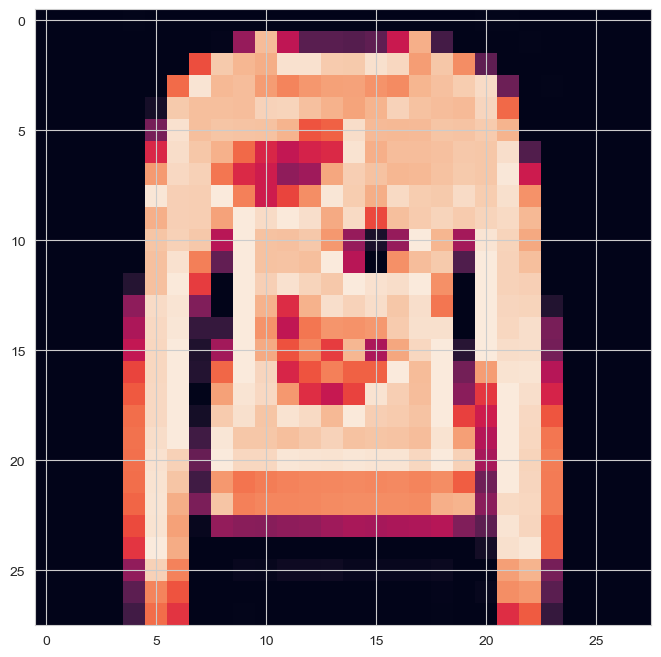

In [126]:
#Seeing the image of the predicted value
plt.imshow(x_test[5000].reshape(28, 28))
plt.show()

#### One thing i have noticed after training the model with validation data and testing data is that the number of
#### wrong prediction in using validation data is more than when using testing data

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___